<a href="https://colab.research.google.com/github/darthfelipe21/OpenIA/blob/main/OpenIA_integracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

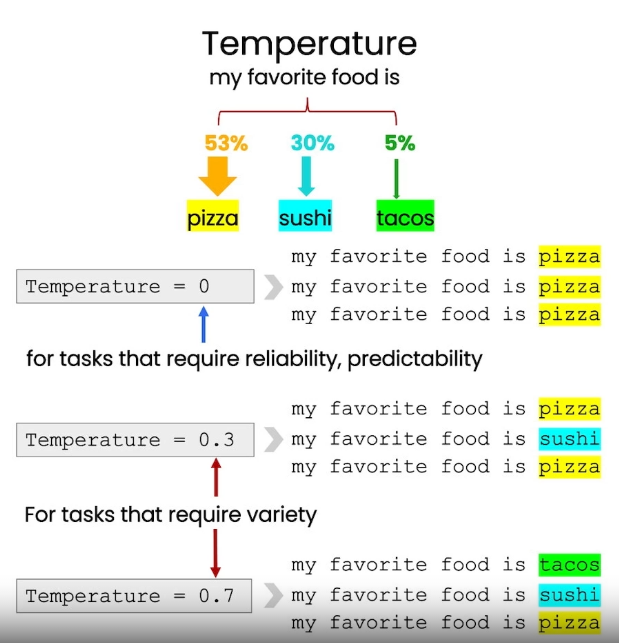

# Guidelines for Prompting
In this lesson, you'll practice two prompting principles and their related tactics in order to write effective prompts for large language models.

## Setup
#### Load the API key and relevant Python libaries.

In this course, we've provided some code that loads the OpenAI API key for you.

In [ ]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = os.getenv('OPENAI_API_KEY')

helper function
Throughout this course, we will use OpenAI's gpt-3.5-turbo model and the chat completions endpoint.

This helper function will make it easier to use prompts and look at the generated outputs:

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

## Prompting Principles
- **Principle 1: Write clear and specific instructions**
- **Principle 2: Give the model time to “think”**

### Tactics

#### Tactic 1: Use delimiters to clearly indicate distinct parts of the input
- Delimiters can be anything like: ```, """, < >, `<tag> </tag>`, `:`

In [ ]:
text = f"""
You should express what you want a model to do by \ 
providing instructions that are as clear and \ 
specific as you can possibly make them. \ 
This will guide the model towards the desired output, \ 
and reduce the chances of receiving irrelevant \ 
or incorrect responses. Don't confuse writing a \ 
clear prompt with writing a short prompt. \ 
In many cases, longer prompts provide more clarity \ 
and context for the model, which can lead to \ 
more detailed and relevant outputs.
"""
prompt = f"""
Summarize the text delimited by triple backticks \ 
into a single sentence.
```{text}```
"""
response = get_completion(prompt)
print(response)

#### Tactic 2: Ask for a structured output
- JSON, HTML

In [ ]:
prompt = f"""
Generate a list of three made-up book titles along \ 
with their authors and genres. 
Provide them in JSON format with the following keys: 
book_id, title, author, genre.
"""
response = get_completion(prompt)
print(response)

#### Tactic 3: Ask the model to check whether conditions are satisfied

In [ ]:
text_1 = f"""
Making a cup of tea is easy! First, you need to get some \ 
water boiling. While that's happening, \ 
grab a cup and put a tea bag in it. Once the water is \ 
hot enough, just pour it over the tea bag. \ 
Let it sit for a bit so the tea can steep. After a \ 
few minutes, take out the tea bag. If you \ 
like, you can add some sugar or milk to taste. \ 
And that's it! You've got yourself a delicious \ 
cup of tea to enjoy.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 1:")
print(response)

In [ ]:
text_2 = f"""
The sun is shining brightly today, and the birds are \
singing. It's a beautiful day to go for a \ 
walk in the park. The flowers are blooming, and the \ 
trees are swaying gently in the breeze. People \ 
are out and about, enjoying the lovely weather. \ 
Some are having picnics, while others are playing \ 
games or simply relaxing on the grass. It's a \ 
perfect day to spend time outdoors and appreciate the \ 
beauty of nature.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_2}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 2:")
print(response)

#### Tactic 4: "Few-shot" prompting

In [ ]:
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \ 
valley flows from a modest spring; the \ 
grandest symphony originates from a single note; \ 
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about resilience.
"""
response = get_completion(prompt)
print(response)

### Principle 2: Give the model time to “think” 

#### Tactic 1: Specify the steps required to complete a task

In [ ]:
text = f"""
In a charming village, siblings Jack and Jill set out on \ 
a quest to fetch water from a hilltop \ 
well. As they climbed, singing joyfully, misfortune \ 
struck—Jack tripped on a stone and tumbled \ 
down the hill, with Jill following suit. \ 
Though slightly battered, the pair returned home to \ 
comforting embraces. Despite the mishap, \ 
their adventurous spirits remained undimmed, and they \ 
continued exploring with delight.
"""
# example 1
prompt_1 = f"""
Perform the following actions: 
1 - Summarize the following text delimited by triple \
backticks with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following \
keys: french_summary, num_names.

Separate your answers with line breaks.

Text:
```{text}```
"""
response = get_completion(prompt_1)
print("Completion for prompt 1:")
print(response)

#### Ask for output in a specified format

In [ ]:
prompt_2 = f"""
Your task is to perform the following actions: 
1 - Summarize the following text delimited by 
  <> with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the 
  following keys: french_summary, num_names.

Use the following format:
Text: <text to summarize>
Summary: <summary>
Translation: <summary translation>
Names: <list of names in Italian summary>
Output JSON: <json with summary and num_names>

Text: <{text}>
"""
response = get_completion(prompt_2)
print("\nCompletion for prompt 2:")
print(response)

#### Tactic 2: Instruct the model to work out its own solution before rushing to a conclusion

In [ ]:
prompt = f"""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need \
 help working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \ 
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations 
as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""
response = get_completion(prompt)
print(response)

#### Note that the student's solution is actually not correct.
#### We can fix this by instructing the model to work out its own solution first.

In [ ]:
prompt = f"""
Your task is to determine if the student's solution \
is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem. 
- Then compare your solution to the student's solution \ 
and evaluate if the student's solution is correct or not. 
Don't decide if the student's solution is correct until 
you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution \
just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help \
working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations \
as a function of the number of square feet.
``` 
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""
response = get_completion(prompt)
print(response)

## Model Limitations: Hallucinations
- Boie is a real company, the product name is not real.

In [ ]:
prompt = f"""
Tell me about AeroGlide UltraSlim Smart Toothbrush by Boie
"""
response = get_completion(prompt)
print(response)

#### Notes on using the OpenAI API outside of this classroom

To install the OpenAI Python library:
```
!pip install openai
```

The library needs to be configured with your account's secret key, which is available on the [website](https://platform.openai.com/account/api-keys). 

You can either set it as the `OPENAI_API_KEY` environment variable before using the library:
 ```
 !export OPENAI_API_KEY='sk-...'
 ```

Or, set `openai.api_key` to its value:

```
import openai
openai.api_key = "sk-..."
```

#### A note about the backslash
- In the course, we are using a backslash `\` to make the text fit on the screen without inserting newline '\n' characters.
- GPT-3 isn't really affected whether you insert newline characters or not.  But when working with LLMs in general, you may consider whether newline characters in your prompt may affect the model's performance.

# Iterative Prompt Develelopment
In this lesson, you'll iteratively analyze and refine your prompts to generate marketing copy from a product fact sheet.

## Setup

In [ ]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

## Generate a marketing product description from a product fact sheet

In [ ]:
fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture, 
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100) 
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black, 
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

OPTIONS
- Soft or hard-floor caster options.
- Two choices of seat foam densities: 
 medium (1.8 lb/ft3) or high (2.8 lb/ft3)
- Armless or 8 position PU armrests 

MATERIALS
SHELL BASE GLIDER
- Cast Aluminum with modified nylon PA6/PA66 coating.
- Shell thickness: 10 mm.
SEAT
- HD36 foam

COUNTRY OF ORIGIN
- Italy
"""

In [ ]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


## Issue 1: The text is too long 
- Limit the number of words/sentences/characters.

In [ ]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


In [ ]:
len(response)

Issue 2. Text focuses on the wrong details
Ask it to focus on the aspects that are relevant to the intended audience.

In [ ]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

In [ ]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

## Issue 3. Description needs a table of dimensions
- Ask it to extract information and organize it in a table.

In [ ]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

After the description, include a table that gives the 
product's dimensions. The table should have two columns.
In the first column include the name of the dimension. 
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website. 
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

## Load Python libraries to view HTML

In [ ]:
from IPython.display import display, HTML

In [ ]:
display(HTML(response))

# Summarizing
In this lesson, you will summarize text with a focus on specific topics.

## Setup

In [ ]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo"): # Andrew mentioned that the prompt/ completion paradigm is preferable for this class
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

## Text to summarize

In [ ]:
prod_review = """
Got this panda plush toy for my daughter's birthday, \
who loves it and takes it everywhere. It's soft and \ 
super cute, and its face has a friendly look. It's \ 
a bit small for what I paid though. I think there \ 
might be other options that are bigger for the \ 
same price. It arrived a day earlier than expected, \ 
so I got to play with it myself before I gave it \ 
to her.
"""

## Summarize with a word/sentence/character limit

In [ ]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)


## Summarize with a focus on shipping and delivery

In [ ]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
Shipping deparmtment. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on any aspects \
that mention shipping and delivery of the product. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

## Summarize with a focus on price and value

In [ ]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
pricing deparmtment, responsible for determining the \
price of the product.  

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on any aspects \
that are relevant to the price and perceived value. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)


#### Comment
- Summaries include topics that are not related to the topic of focus.

## Try "extract" instead of "summarize"

In [ ]:
prompt = f"""
Your task is to extract relevant information from \ 
a product review from an ecommerce site to give \
feedback to the Shipping department. 

From the review below, delimited by triple quotes \
extract the information relevant to shipping and \ 
delivery. Limit to 30 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

## Summarize multiple product reviews

In [ ]:
review_1 = prod_review 

# review for a standing lamp
review_2 = """
Needed a nice lamp for my bedroom, and this one \
had additional storage and not too high of a price \
point. Got it fast - arrived in 2 days. The string \
to the lamp broke during the transit and the company \
happily sent over a new one. Came within a few days \
as well. It was easy to put together. Then I had a \
missing part, so I contacted their support and they \
very quickly got me the missing piece! Seems to me \
to be a great company that cares about their customers \
and products. 
"""

# review for an electric toothbrush
review_3 = """
My dental hygienist recommended an electric toothbrush, \
which is why I got this. The battery life seems to be \
pretty impressive so far. After initial charging and \
leaving the charger plugged in for the first week to \
condition the battery, I've unplugged the charger and \
been using it for twice daily brushing for the last \
3 weeks all on the same charge. But the toothbrush head \
is too small. I’ve seen baby toothbrushes bigger than \
this one. I wish the head was bigger with different \
length bristles to get between teeth better because \
this one doesn’t.  Overall if you can get this one \
around the $50 mark, it's a good deal. The manufactuer's \
replacements heads are pretty expensive, but you can \
get generic ones that're more reasonably priced. This \
toothbrush makes me feel like I've been to the dentist \
every day. My teeth feel sparkly clean! 
"""

# review for a blender
review_4 = """
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

reviews = [review_1, review_2, review_3, review_4]

In [ ]:
for i in range(len(reviews)):
    prompt = f"""
    Your task is to generate a short summary of a product \ 
    review from an ecommerce site. 

    Summarize the review below, delimited by triple \
    backticks in at most 20 words. 

    Review: ```{reviews[i]}```
    """

    response = get_completion(prompt)
    print(i, response, "\n")

# Inferring
In this lesson, you will infer sentiment and topics from product reviews and news articles.

## Setup

In [ ]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

## Product review text

In [ ]:
lamp_review = """
Needed a nice lamp for my bedroom, and this one had \
additional storage and not too high of a price point. \
Got it fast.  The string to our lamp broke during the \
transit and the company happily sent over a new one. \
Came within a few days as well. It was easy to put \
together.  I had a missing part, so I contacted their \
support and they very quickly got me the missing piece! \
Lumina seems to me to be a great company that cares \
about their customers and products!!
"""

## Sentiment (positive/negative)

In [ ]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

In [ ]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Give your answer as a single word, either "positive" \
or "negative".

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

## Identify types of emotions

In [ ]:
prompt = f"""
Identify a list of emotions that the writer of the \
following review is expressing. Include no more than \
five items in the list. Format your answer as a list of \
lower-case words separated by commas.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

## Identify anger

In [ ]:
prompt = f"""
Is the writer of the following review expressing anger?\
The review is delimited with triple backticks. \
Give your answer as either yes or no.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

## Extract product and company name from customer reviews

In [ ]:
prompt = f"""
Identify the following items from the review text: 
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Item" and "Brand" as the keys. 
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
  
Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

## Doing multiple tasks at once

In [ ]:
prompt = f"""
Identify the following items from the review text: 
- Sentiment (positive or negative)
- Is the reviewer expressing anger? (true or false)
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Sentiment", "Anger", "Item" and "Brand" as the keys.
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
Format the Anger value as a boolean.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

## Inferring topics

In [ ]:
story = """
In a recent survey conducted by the government, 
public sector employees were asked to rate their level 
of satisfaction with the department they work at. 
The results revealed that NASA was the most popular 
department with a satisfaction rating of 95%.

One NASA employee, John Smith, commented on the findings, 
stating, "I'm not surprised that NASA came out on top. 
It's a great place to work with amazing people and 
incredible opportunities. I'm proud to be a part of 
such an innovative organization."

The results were also welcomed by NASA's management team, 
with Director Tom Johnson stating, "We are thrilled to 
hear that our employees are satisfied with their work at NASA. 
We have a talented and dedicated team who work tirelessly 
to achieve our goals, and it's fantastic to see that their 
hard work is paying off."

The survey also revealed that the 
Social Security Administration had the lowest satisfaction 
rating, with only 45% of employees indicating they were 
satisfied with their job. The government has pledged to 
address the concerns raised by employees in the survey and 
work towards improving job satisfaction across all departments.
"""

## Infer 5 topics

In [ ]:
prompt = f"""
Determine five topics that are being discussed in the \
following text, which is delimited by triple backticks.

Make each item one or two words long. 

Format your response as a list of items separated by commas.

Text sample: '''{story}'''
"""
response = get_completion(prompt)
print(response)

In [ ]:
response.split(sep=',')

In [ ]:
topic_list = [
    "nasa", "local government", "engineering", 
    "employee satisfaction", "federal government"
]

## Make a news alert for certain topics

In [ ]:
prompt = f"""
Determine whether each item in the following list of \
topics is a topic in the text below, which
is delimited with triple backticks.

Give your answer as list with 0 or 1 for each topic.\

List of topics: {", ".join(topic_list)}

Text sample: '''{story}'''
"""
response = get_completion(prompt)
print(response)

In [ ]:
topic_dict = {i.split(': ')[0]: int(i.split(': ')[1]) for i in response.split(sep='\n')}
if topic_dict['nasa'] == 1:
    print("ALERT: New NASA story!")

# Transforming

In this notebook, we will explore how to use Large Language Models for text transformation tasks such as language translation, spelling and grammar checking, tone adjustment, and format conversion.

## Setup

In [ ]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo", temperature=0): 
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, 
    )
    return response.choices[0].message["content"]

## Translation

ChatGPT is trained with sources in many languages. This gives the model the ability to do translation. Here are some examples of how to use this capability.

In [ ]:
prompt = f"""
Translate the following English text to Spanish: \ 
```Hi, I would like to order a blender```
"""
response = get_completion(prompt)
print(response)

In [ ]:
prompt = f"""
Tell me which language this is: 
```Combien coûte le lampadaire?```
"""
response = get_completion(prompt)
print(response)

In [ ]:
prompt = f"""
Translate the following  text to French and Spanish
and English pirate: \
```I want to order a basketball```
"""
response = get_completion(prompt)
print(response)

In [ ]:
prompt = f"""
Translate the following text to Spanish in both the \
formal and informal forms: 
'Would you like to order a pillow?'
"""
response = get_completion(prompt)
print(response)

### Universal Translator
Imagine you are in charge of IT at a large multinational e-commerce company. Users are messaging you with IT issues in all their native languages. Your staff is from all over the world and speaks only their native languages. You need a universal translator!

In [ ]:
user_messages = [
  "La performance du système est plus lente que d'habitude.",  # System performance is slower than normal         
  "Mi monitor tiene píxeles que no se iluminan.",              # My monitor has pixels that are not lighting
  "Il mio mouse non funziona",                                 # My mouse is not working
  "Mój klawisz Ctrl jest zepsuty",                             # My keyboard has a broken control key
  "我的屏幕在闪烁"                                               # My screen is flashing
] 

In [ ]:
for issue in user_messages:
    prompt = f"Tell me what language this is: ```{issue}```"
    lang = get_completion(prompt)
    print(f"Original message ({lang}): {issue}")

    prompt = f"""
    Translate the following  text to English \
    and Korean: ```{issue}```
    """
    response = get_completion(prompt)
    print(response, "\n")

## Tone Transformation
Writing can vary based on the intended audience. ChatGPT can produce different tones.

In [ ]:
prompt = f"""
Translate the following from slang to a business letter: 
'Dude, This is Joe, check out this spec on this standing lamp.'
"""
response = get_completion(prompt)
print(response)

## Format Conversion
ChatGPT can translate between formats. The prompt should describe the input and output formats.

In [ ]:
data_json = { "resturant employees" :[ 
    {"name":"Shyam", "email":"shyamjaiswal@gmail.com"},
    {"name":"Bob", "email":"bob32@gmail.com"},
    {"name":"Jai", "email":"jai87@gmail.com"}
]}

prompt = f"""
Translate the following python dictionary from JSON to an HTML \
table with column headers and title: {data_json}
"""
response = get_completion(prompt)
print(response)

In [ ]:
from IPython.display import display, Markdown, Latex, HTML, JSON
display(HTML(response))

## Spellcheck/Grammar check.

Here are some examples of common grammar and spelling problems and the LLM's response. 

To signal to the LLM that you want it to proofread your text, you instruct the model to 'proofread' or 'proofread and correct'.

In [ ]:
text = [ 
  "The girl with the black and white puppies have a ball.",  # The girl has a ball.
  "Yolanda has her notebook.", # ok
  "Its going to be a long day. Does the car need it’s oil changed?",  # Homonyms
  "Their goes my freedom. There going to bring they’re suitcases.",  # Homonyms
  "Your going to need you’re notebook.",  # Homonyms
  "That medicine effects my ability to sleep. Have you heard of the butterfly affect?", # Homonyms
  "This phrase is to cherck chatGPT for speling abilitty"  # spelling
]
for t in text:
    prompt = f"""Proofread and correct the following text
    and rewrite the corrected version. If you don't find
    and errors, just say "No errors found". Don't use 
    any punctuation around the text:
    ```{t}```"""
    response = get_completion(prompt)
    print(response)

In [ ]:
text = f"""
Got this for my daughter for her birthday cuz she keeps taking \
mine from my room.  Yes, adults also like pandas too.  She takes \
it everywhere with her, and it's super soft and cute.  One of the \
ears is a bit lower than the other, and I don't think that was \
designed to be asymmetrical. It's a bit small for what I paid for it \
though. I think there might be other options that are bigger for \
the same price.  It arrived a day earlier than expected, so I got \
to play with it myself before I gave it to my daughter.
"""
prompt = f"proofread and correct this review: ```{text}```"
response = get_completion(prompt)
print(response)

In [ ]:
from redlines import Redlines

diff = Redlines(text,response)
display(Markdown(diff.output_markdown))

In [ ]:
prompt = f"""
proofread and correct this review. Make it more compelling. 
Ensure it follows APA style guide and targets an advanced reader. 
Output in markdown format.
Text: ```{text}```
"""
response = get_completion(prompt)
display(Markdown(response))

# Expanding
In this lesson, you will generate customer service emails that are tailored to each customer's review.

## Setup

In [ ]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo",temperature=0): # Andrew mentioned that the prompt/ completion paradigm is preferable for this class
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

## Customize the automated reply to a customer email

In [ ]:
# given the sentiment from the lesson on "inferring",
# and the original customer message, customize the email
sentiment = "negative"

# review for a blender
review = f"""
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

In [ ]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt)
print(response)

## Remind the model to use details from the customer's email

In [ ]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt, temperature=0.7)
print(response)

# The Chat Format

In this notebook, you will explore how you can utilize the chat format to have extended conversations with chatbots personalized or specialized for specific tasks or behaviors.

## Setup

In [ ]:
import os
import openai
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
#     print(str(response.choices[0].message))
    return response.choices[0].message["content"]

In [ ]:
messages =  [  
{'role':'system', 'content':'You are an assistant that speaks like Shakespeare.'},    
{'role':'user', 'content':'tell me a joke'},   
{'role':'assistant', 'content':'Why did the chicken cross the road'},   
{'role':'user', 'content':'I don\'t know'}  ]

In [ ]:
response = get_completion_from_messages(messages, temperature=1)
print(response)

In [ ]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Hi, my name is Isa'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

In [ ]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Yes,  can you remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

In [ ]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},
{'role':'user', 'content':'Hi, my name is Isa'},
{'role':'assistant', 'content': "Hi Isa! It's nice to meet you. \
Is there anything I can help you with today?"},
{'role':'user', 'content':'Yes, you can remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

# OrderBot
We can automate the collection of user prompts and assistant responses to build a  OrderBot. The OrderBot will take orders at a pizza restaurant. 

In [ ]:
def collect_messages(_):
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context) 
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    panels.append(
        pn.Row('Assistant:', pn.pane.Markdown(response, width=600, style={'background-color': '#F6F6F6'})))
 
    return pn.Column(*panels)

In [ ]:
import panel as pn  # GUI
pn.extension()

panels = [] # collect display 

context = [ {'role':'system', 'content':"""
You are OrderBot, an automated service to collect orders for a pizza restaurant. \
You first greet the customer, then collects the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
"""} ]  # accumulate messages


inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),
)

dashboard

In [ ]:
messages =  context.copy()
messages.append(
{'role':'system', 'content':'create a json summary of the previous food order. Itemize the price for each item\
 The fields should be 1) pizza, include size 2) list of toppings 3) list of drinks, include size   4) list of sides include size  5)total price '},    
)
 #The fields should be 1) pizza, price 2) list of toppings 3) list of drinks, include size include price  4) list of sides include size include price, 5)total price '},    

response = get_completion_from_messages(messages, temperature=0)
print(response)